In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
from pycaret.classification import *
setup = setup(data=data, target='y', session_id=123, train_size = 0.8, fold=10, silent=True,log_plots=True,use_gpu=True)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(45211, 11)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9071,0.9341,0.4865,0.6350,0.5506,0.4998,0.5055,1.3830
xgboost,Extreme Gradient Boosting,0.9063,0.9301,0.4906,0.6278,0.5506,0.4992,0.5040,0.4350
gbc,Gradient Boosting Classifier,0.9050,0.9222,0.4024,0.6536,0.4977,0.4485,0.4648,2.9240
rf,Random Forest Classifier,0.9023,0.9246,0.3970,0.6322,0.4873,0.4364,0.4511,1.7430
lr,Logistic Regression,0.9002,0.9021,0.3318,0.6433,0.4371,0.3885,0.4146,1.9860
lda,Linear Discriminant Analysis,0.8997,0.9018,0.4338,0.5990,0.5027,0.4485,0.4560,0.1670
ada,Ada Boost Classifier,0.8993,0.9065,0.3592,0.6213,0.4547,0.4036,0.4223,0.8000
ridge,Ridge Classifier,0.8983,0.0000,0.2677,0.6629,0.3808,0.3361,0.3778,0.0370
et,Extra Trees Classifier,0.8956,0.9028,0.3585,0.5884,0.4453,0.3914,0.4062,2.0840
dummy,Dummy Classifier,0.8830,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0200


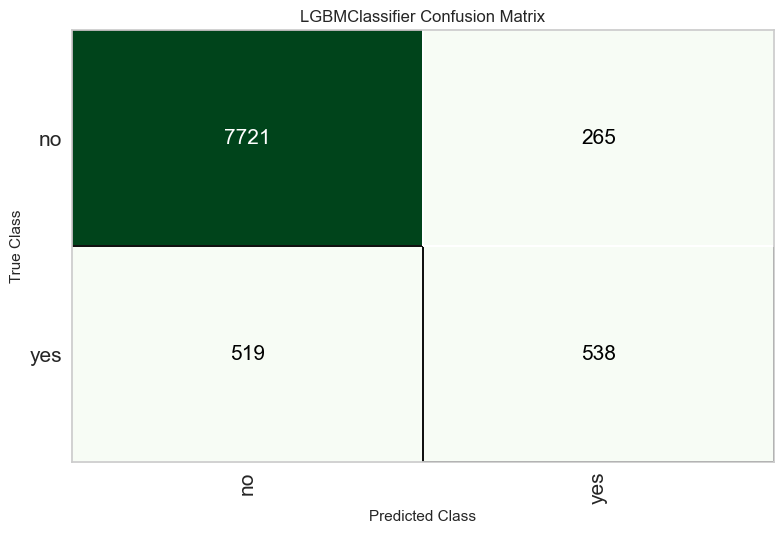

In [6]:
lightgbm = create_model('lightgbm')
plot_model(lightgbm, "confusion_matrix")

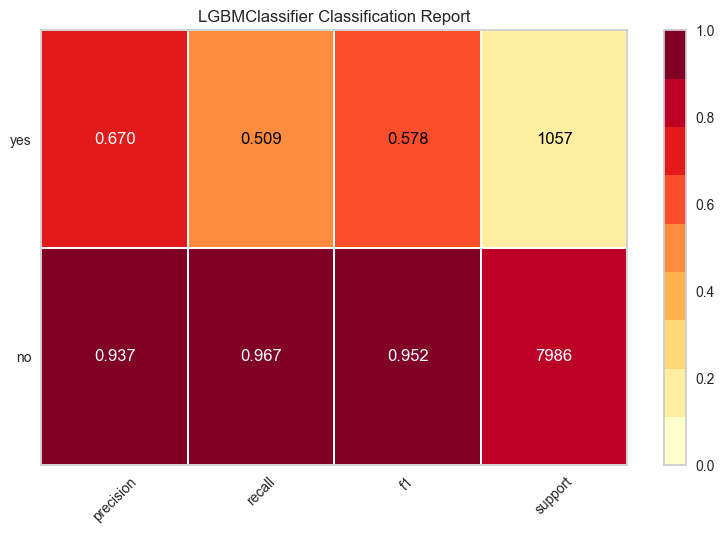

In [7]:
plot_model(lightgbm, plot = 'class_report')

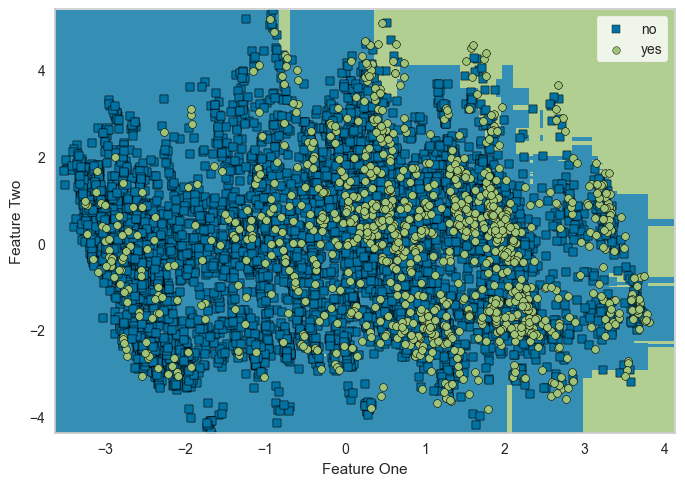

In [8]:
plot_model(lightgbm, plot='boundary')

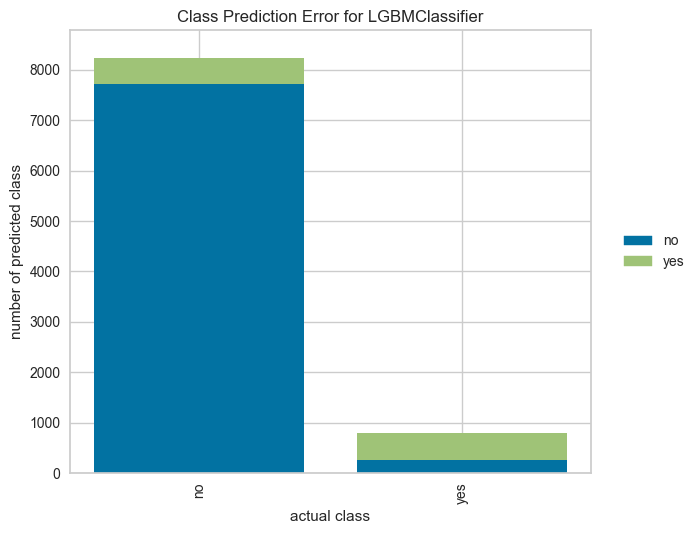

In [9]:
plot_model(lightgbm, plot = 'error')

In [10]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9035,0.9282,0.4113,0.6350,0.4993,0.4486,0.4616
1,0.8996,0.9199,0.4279,0.5993,0.4993,0.4453,0.4531
2,0.9077,0.9271,0.4421,0.6561,0.5282,0.4792,0.4907
3,0.9077,0.9270,0.4232,0.6654,0.5173,0.4691,0.4838
4,0.9082,0.9299,0.4374,0.6631,0.5271,0.4786,0.4913
5,0.9054,0.9357,0.4444,0.6373,0.5237,0.4730,0.4825
6,0.9030,0.9243,0.3986,0.6377,0.4906,0.4401,0.4550
7,0.9066,0.9226,0.4316,0.6536,0.5199,0.4705,0.4830
8,0.9051,0.9291,0.4515,0.6325,0.5269,0.4758,0.4842


In [11]:
print(tuned_lightgbm)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, device='gpu',
               feature_fraction=0.5, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=66, min_child_weight=0.001,
               min_split_gain=0.4, n_estimators=90, n_jobs=-1, num_leaves=90,
               objective=None, random_state=123, reg_alpha=0.0005,
               reg_lambda=0.1, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


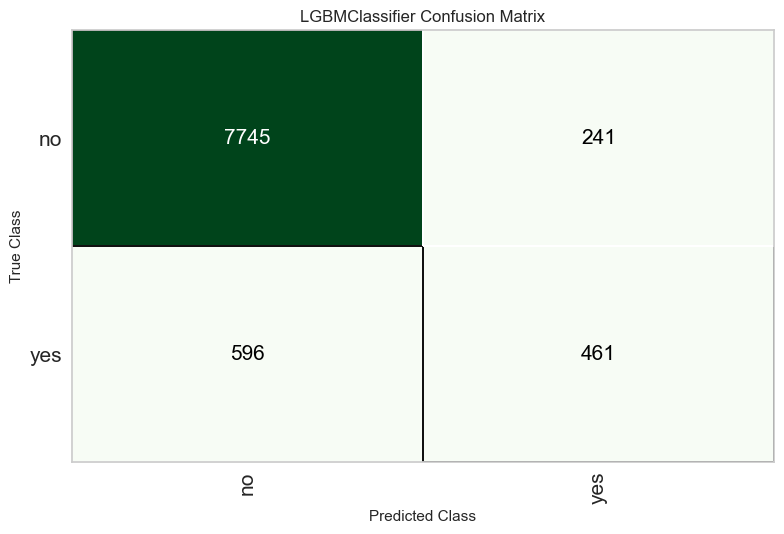

In [12]:
plot_model(tuned_lightgbm, "confusion_matrix")

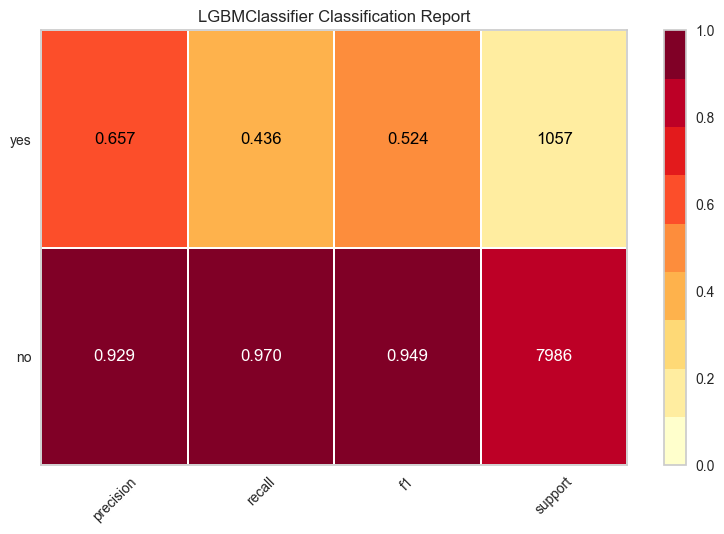

In [13]:
plot_model(tuned_lightgbm, plot = 'class_report')

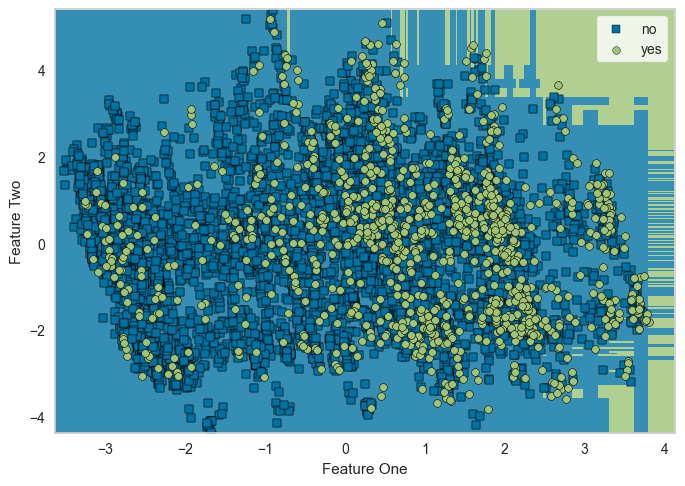

In [14]:
plot_model(tuned_lightgbm, plot='boundary')

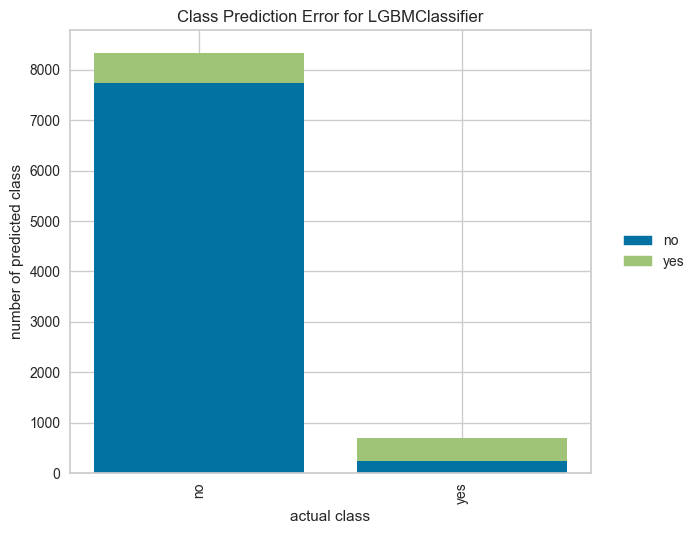

In [15]:
plot_model(tuned_lightgbm, plot = 'error')

In [16]:
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9074,0.9260,0.4361,0.6567,0.5242,0.4752,0.4874


In [17]:
final_model = finalize_model(tuned_lightgbm)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

In [18]:
print(final_model)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, device='gpu',
               feature_fraction=0.5, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=66, min_child_weight=0.001,
               min_split_gain=0.4, n_estimators=90, n_jobs=-1, num_leaves=90,
               objective=None, random_state=123, reg_alpha=0.0005,
               reg_lambda=0.1, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [24]:
import lightgbm as lgb
from sklearn import preprocessing 

In [25]:
from lightgbm import LGBMClassifier

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [28]:
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
data["job"] = label_encoder.fit_transform(data["job"])
data["marital"] = label_encoder.fit_transform(data["marital"])
data["education_qual"] = label_encoder.fit_transform(data["education_qual"])
data["call_type"] = label_encoder.fit_transform(data["call_type"])
data["mon"] = label_encoder.fit_transform(data["mon"])
data["dur"] = label_encoder.fit_transform(data["dur"])
data["prev_outcome"] = label_encoder.fit_transform(data["prev_outcome"])
data["y"] = label_encoder.fit_transform(data["y"])
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,4,1,2,2,5,8,261,1,3,0
1,44,9,2,1,2,5,8,151,1,3,0
2,33,2,1,1,2,5,8,76,1,3,0
3,47,1,1,3,2,5,8,92,1,3,0
4,33,11,2,3,2,5,8,198,1,3,0


In [31]:
y = data['y']
X = data.drop('y', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

(36168, 10)
(9043, 10)


In [48]:
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [49]:
print(model.score(X_train, y_train))
print(model.best_score_)

0.9274220305242203
defaultdict(<class 'collections.OrderedDict'>, {})


In [53]:
y_pred=model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9084


In [55]:
y_pred_train = model.predict(X_train)

In [56]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9274


In [58]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9274
Test set score: 0.9084


In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[7709  276]
 [ 552  506]]

True Positives(TP) =  7709

True Negatives(TN) =  506

False Positives(FP) =  276

False Negatives(FN) =  552


<AxesSubplot: >

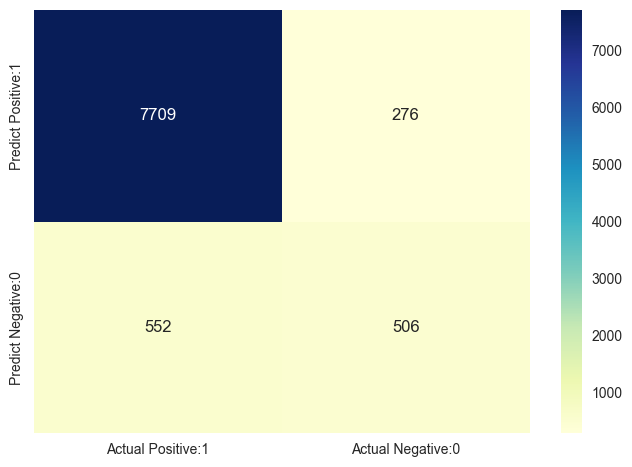

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.65      0.48      0.55      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.72      0.75      9043
weighted avg       0.90      0.91      0.90      9043



<AxesSubplot: xlabel='importance', ylabel='features'>

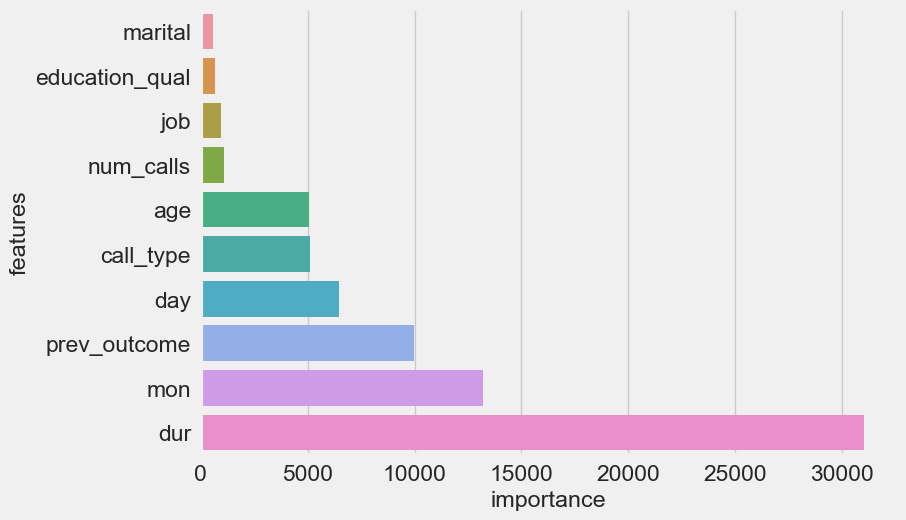

In [65]:
import matplotlib.style as style
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter

sns.set_context("talk")
style.use('fivethirtyeight')

fi = pd.DataFrame()
fi['features'] = X.columns.values.tolist()
fi['importance'] = model.booster_.feature_importance(importance_type='gain')

sns.barplot(x='importance', y='features', data=fi.sort_values(by='importance', ascending=True))

In [66]:
model.booster_.save_model('model.txt')